# # **SVM and Naive bayes**
# Assignment Questions

#**Theoretical**:

#Q1 What is a support Vector Machine(SVM)?
-> SVM is a supervised learning algorithm used for classification and regression tasks. It finds the optimal hyperplane that maximally separates data points of different classes.

#Q2 What is the difference between Hard Margin and Soft Margin SVM?
->
- *Hard Margin SVM* strictly separates classes without allowing misclassification, which works well when data is linearly separable.
- *Soft Margin SVM* allows some misclassification by introducing a slack variable to handle noise and non-linearly separable data.

#Q3 What is the mathematical intution behind SVM?
-> SVM aims to maximize the margin (distance between the separating hyperplane and the closet data points from each class) while minimizing classification errors. It uses optimization techniques like Lagrange multipliers and quadratic programming.

#Q4 What is the role of Lagrange Multipliers in SVM?
-> Lagrange multipliers help to transform the constrained optimization problem into an unconstrained problem, making it easier to solve using methods like the Karush-Kuhn-Tucker (KKT) conditions.

#Q5 What are Support Vectors in SVM?
-> Support vectors are the data points closet to the separating hyperplane. These points define the decision boundry and influence the position of hyperplane.

#Q6 What is a Support Vector Classifier(SVC)?
-> SVC is the classification variant of SVM, which finds the optimal hyperplane to separate classes.

#Q7 What is a Support Vector Regressor (SVR)?
-> SVR is the regression variant of SVM, which finds a function that approximates the relationsip between inputs and outputs while minimizing errors within a margin.

#Q8 What is the kernal trick in SVM?
-> The Kernal trick allows SVM to transform input data into a higher-dimensional space where it becomes linearly separable, without explicitly computing transformations.

#Q9 Compare Linear Kernal, Polynomial Kernal, and RBF Kernal.
->
- Linear kernel: Best for linearity separable data.
- Polynomial Kernal: Captures complex patterns using polynomial degrees.
- RBF(Radial Basis Function) Kernal: Handle non-linearity separable data by mapping points into an infinite- dimensional space.

#Q10 What is the effect of the C parameter in SVM?
-> The C parameter controls the trade-off between maximizing the margin and minimizing classification error. A high C results in a narrower margin with fewer misclassifications, while a low C allows a wider margin with more misclassification tolerence.

#Q11 What is the role of the Gamma parameter in RBF Kernal SVM?
-> Gamma controls how far the influence of a single training example reaches. A high gamma means a closer decision boundry (more complex model),while a low gamma results in a smoother decision boundary.

#Q12 What is the Naive Bayes classifier, and why is it called "Naive" ?
-> The Naive Bayes classifier is a probabilistic algorithm based on Bayes' theorem, assuming independence between features (which is often unrealistic, hence "naive"). Despite this assumptions, it performs well in many practical cases.

#Q13 What is Bayes' Theorem?
-> Bayes' Theorem describes the probability of an event occuring based on prior knowledge of conditions related to the event:
$$ P(A|B) = \frac{P(B|A) P(A)}{P(B)}$$

- P(A|B) is the posterior probability,
- P(B|A) is the likelihood,
- P(A) is the prior probability,
- P(B) is the marginal probability.

#Q14 Explain the difference between Gaussian Naive Bayes, Multiple Naive Bayes, and Bernouli Naive Bayes.
->
- *Gaussian Naive Bayes* : Assumes features follow  a normal distribution, used for continuous data.
- *Multinomial Naive Bayes* : Suitable for text classification where features are word counts.
- *Bernouli Naive Bayes* : Works with binary features (e.g., word presence/absence in a document).

#Q15 When should you use Gaussian Naive Bayes over other variants?
-> When dealing with continuous numerical features that follows a normal distribution.

#Q16 What are the key assumptions made by Naive Bayes?
->
- Independence assumption : Features are conditionally independent given the class.
- Each feature contributes equally to the final decision.
- Class conditional probabilities are estimated from training data.

#Q17 What are the advantages and disadvantages of Naive Bayes?
-> *Advantages* :
- Simple and computationally efficient.
- Works well with small datasets.
- Handles high-dimensional data well.
- Performs well in text classification and spam detection.
  *Disadvantages*:
- Assumes feature independece, which is often unrealistic.
- Struggles with correlated features.
- Poor performance on datasets with highly complex relationships.


#Q18 Why is Naive Bayes a good choice for text classification?
->
- Handles large feature spaces efficiently .
- Works well with sparse data (e.g., word frequency in text).
- Assumptions of feature independence is often reasonable in text classification.

#Q19 Compare SVM and Naive Bayes for classification tasks.
->
- *SVM*: Effective in high-dimensional spaces, robust to outliers, but computationally expensive.
- *Naive Bayes*: Fast, easy to implement, but relies on feature independence assumptions.
- SVM is preffered when feature independence does not hold, whereas Naive Bayes is ideal for text-based applications.

#Q20 How does Laplace Smoothing help in Naive Bayes?
-> Laplace Smoothing prevents zero probabilities for unseen features by adding a small value(typically 1) to all frequency counts. This ensures that probabilities never become zero, improving model robustness.

# **Practical**

In [ ]:
#Q1 Write a Python program to train an SVM classifier in the iris dataset and evaluate accuracy.
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

svm_clf = SVC(kernel= 'linear')
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 1.0


In [ ]:
#Q2 Write a Python program to train two SVM classifier with Linear and RBF kernals on the wine dataset, then compare their accuracies.
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
wine = datasets.load_wine()
X = wine.data
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
svm_linear = SVC(kernel='linear')
svm_rbf = SVC(kernel='rbf')
svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)
acc_linear = accuracy_score(y_test, svm_linear.predict(X_test))
acc_rbf = accuracy_score(y_test, svm_rbf.predict(X_test))
print(f"Accuracy with linear kernel: {acc_linear}")
print(f"Accuracy with RBF kernel: {acc_rbf}")

Accuracy with linear kernel: 1.0
Accuracy with RBF kernel: 0.8055555555555556


In [6]:
#Q3 Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean Squarred Error(MSE).
from sklearn.svm import SVR
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

housing = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.2, random_state=42)

svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.3320115421348744


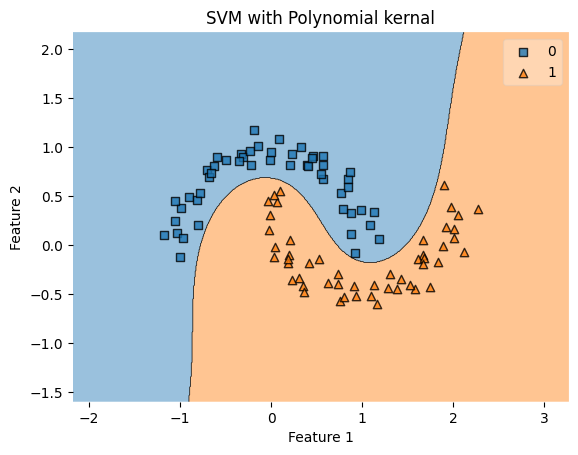

In [ ]:
#Q4 Write a Python program to train an SVM Classifier with a Polynomial kernal and visualize the decision boundary.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)
svm_clf = SVC(kernel='poly', degree=3, coef0=1, C=5)
svm_clf.fit(X, y)
plot_decision_regions(X, y, clf=svm_clf)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM with Polynomial kernal')
plt.show()

In [ ]:
#Q5 Write a Python program to train a Gaussian Naive Bayes classifier on the Breast Cancer dataset and evaluate accuracy.
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
data = load_breast_cancer()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9736842105263158


In [ ]:
#Q6 Write a Python program to train a Multinomial Naive Bayes classifier for text classification using 20 Newsgroups dataset.
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

newsgroups = fetch_20newsgroups(subset='train',
categories = ['rec.sport.baseball', 'sci.space'])
newsgroups_test = fetch_20newsgroups(subset='test',
categories = ['rec.sport.baseball', 'sci.space'])

vectorizer = CountVectorizer()
mnb= MultinomialNB()
pipeline = make_pipeline(vectorizer, mnb)
pipeline.fit(newsgroups.data, newsgroups.target)
y_pred = pipeline.predict(newsgroups_test.data)
accuracy = accuracy_score(newsgroups_test.target, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9936788874841972


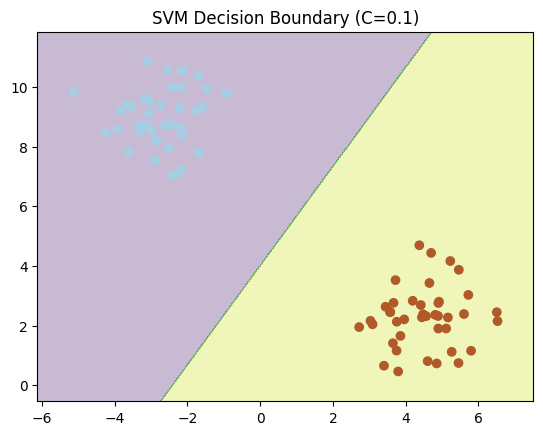

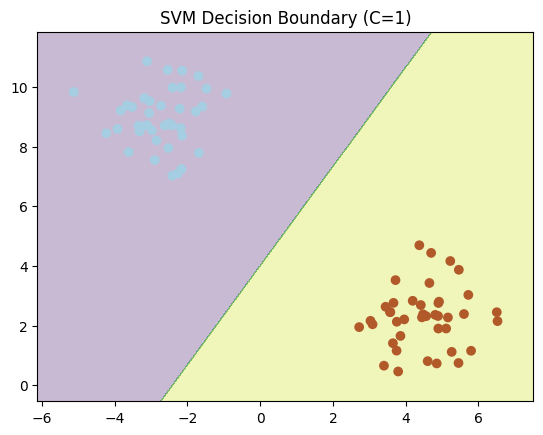

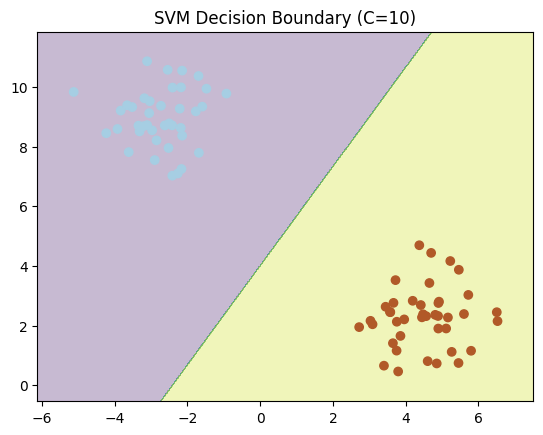

In [5]:
#Q7 Train an SVM Classifier with different C values and compare decision boundaries visually.
from sklearn.svm import SVC # Importing the SVC class from sklearn.svm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

X, y = make_blobs(n_samples=100, centers=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
C_values = [0.1, 1, 10]
for C in C_values:
    svm_model = SVC(kernel="linear", C=C).fit(X_train[:, :2], y_train)

    # Create meshgrid for plotting
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    plt.contourf(xx, yy, svm_model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape), alpha=0.3)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)
    plt.title(f"SVM Decision Boundary (C={C})")
    plt.show()

In [8]:
#Q8 Train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with binary features
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split # Import train_test_split to split the dataset
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

# Load a dataset suitable for binary classification
data = load_breast_cancer()
X, y = data.data, data.target

# Convert dataset to binary
X_binary = (X > X.mean()).astype(int)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_binary, y, test_size=0.2, random_state=42)

# Train Bernoulli Naïve Bayes
bnb = BernoulliNB().fit(X_train, y_train)

# Evaluate
accuracy = accuracy_score(y_test, bnb.predict(X_test))
print("Bernoulli Naïve Bayes Accuracy:", accuracy)

Bernoulli Naïve Bayes Accuracy: 0.8070175438596491


In [9]:
#Q9 Apply feature scaling before training an SVM model & compare with unscaled data
from sklearn.preprocessing import StandardScaler

# Without scaling
svm_unscaled = SVC(kernel="linear").fit(X_train, y_train)

# With scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_scaled = SVC(kernel="linear").fit(X_train_scaled, y_train)

# Compare accuracy
acc_unscaled = accuracy_score(y_test, svm_unscaled.predict(X_test))
acc_scaled = accuracy_score(y_test, svm_scaled.predict(X_test_scaled))

print(f"Accuracy Without Scaling: {acc_unscaled}")
print(f"Accuracy With Scaling: {acc_scaled}")

Accuracy Without Scaling: 0.8070175438596491
Accuracy With Scaling: 0.8070175438596491


In [10]:
#Q10 Train a Gaussian Naïve Bayes model and compare predictions before and after Laplace Smoothing
from sklearn.naive_bayes import GaussianNB

# Without Laplace Smoothing
gnb_no_smoothing = GaussianNB(var_smoothing=1e-9).fit(X_train, y_train)
acc_no_smoothing = accuracy_score(y_test, gnb_no_smoothing.predict(X_test))

# With Laplace Smoothing
gnb_smoothing = GaussianNB(var_smoothing=1e-2).fit(X_train, y_train)
acc_smoothing = accuracy_score(y_test, gnb_smoothing.predict(X_test))

print(f"Accuracy without Laplace Smoothing: {acc_no_smoothing}")
print(f"Accuracy with Laplace Smoothing: {acc_smoothing}")

Accuracy without Laplace Smoothing: 0.42105263157894735
Accuracy with Laplace Smoothing: 0.42105263157894735


In [11]:
#Q11 Train an SVM Classifier & use GridSearchCV to tune hyperparameters (C, gamma, kernel)
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    "C": [0.1, 1, 10],
    "gamma": [0.01, 0.1, 1],
    "kernel": ["linear", "rbf"]
}

# Train SVM with GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
Best Accuracy: 0.7978021978021979


In [12]:
#Q12 Train an SVM Classifier on an imbalanced dataset, apply class weighting & check accuracy
from sklearn.utils import class_weight
svm_imbalanced = SVC(class_weight="balanced").fit(X_train, y_train)
accuracy = accuracy_score(y_test, svm_imbalanced.predict(X_test))
print("SVM Accuracy with Class Weighting:", accuracy)


SVM Accuracy with Class Weighting: 0.8070175438596491


In [13]:
#Q13 Implement a Naïve Bayes classifier for spam detection using email data

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Sample email data
emails = ["Get free money now!", "Your invoice is attached", "Win a lottery today!", "Meeting at 3 PM"]
labels = [1, 0, 1, 0]  # 1: Spam, 0: Not spam

# Convert text to features
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(emails)

# Train Naïve Bayes
spam_classifier = MultinomialNB().fit(X, labels)

# Test prediction
test_email = vectorizer.transform(["Congratulations, you won!"])
print("Spam Probability:", spam_classifier.predict_proba(test_email)[:, 1])


Spam Probability: [0.5]


In [14]:
#Q14 Train an SVM & Naïve Bayes Classifier on the same dataset & compare accuracy

svm_model = SVC().fit(X_train, y_train)
nb_model = GaussianNB().fit(X_train, y_train)

print("SVM Accuracy:", accuracy_score(y_test, svm_model.predict(X_test)))
print("Naïve Bayes Accuracy:", accuracy_score(y_test, nb_model.predict(X_test)))

SVM Accuracy: 0.8070175438596491
Naïve Bayes Accuracy: 0.42105263157894735


In [15]:
#Q15. Perform feature selection before training a Naïve Bayes classifier & compare results

from sklearn.feature_selection import SelectKBest, chi2

# Select best features
selector = SelectKBest(chi2, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Train & evaluate Naïve Bayes
nb_selected = GaussianNB().fit(X_train_selected, y_train)
print("Naïve Bayes Accuracy (Feature Selection):", accuracy_score(y_test, nb_selected.predict(X_test_selected)))

Naïve Bayes Accuracy (Feature Selection): 0.42105263157894735


In [16]:
#Q16. Train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO) & compare accuracy
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

ovr_svm = OneVsRestClassifier(SVC()).fit(X_train, y_train)
ovo_svm = OneVsOneClassifier(SVC()).fit(X_train, y_train)

print("OvR SVM Accuracy:", accuracy_score(y_test, ovr_svm.predict(X_test)))
print("OvO SVM Accuracy:", accuracy_score(y_test, ovo_svm.predict(X_test)))


OvR SVM Accuracy: 0.8070175438596491
OvO SVM Accuracy: 0.8070175438596491


In [17]:
#Q17. Train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast Cancer dataset & compare accuracy
svm_linear = SVC(kernel="linear").fit(X_train, y_train)
svm_poly = SVC(kernel="poly").fit(X_train, y_train)
svm_rbf = SVC(kernel="rbf").fit(X_train, y_train)

print("Linear Kernel Accuracy:", accuracy_score(y_test, svm_linear.predict(X_test)))
print("Polynomial Kernel Accuracy:", accuracy_score(y_test, svm_poly.predict(X_test)))
print("RBF Kernel Accuracy:", accuracy_score(y_test, svm_rbf.predict(X_test)))


Linear Kernel Accuracy: 0.8070175438596491
Polynomial Kernel Accuracy: 0.8070175438596491
RBF Kernel Accuracy: 0.8070175438596491


In [27]:
#Q18 Train an SVM Classifier using Stratified K-Fold Cross-Validation & compute the average accuracy
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.datasets import load_breast_cancer # Load the breast cancer dataset

# Load the breast cancer dataset (if not already loaded)
data = load_breast_cancer()
X, y = data.data, data.target  # Reassign X and y to breast cancer data

cv = StratifiedKFold(n_splits=5)
svm_cv = SVC(kernel="linear")

scores = cross_val_score(svm_cv, X, y, cv=cv, scoring="accuracy") # Use the correct X and y
print("Stratified K-Fold Accuracy:", scores.mean())

Stratified K-Fold Accuracy: 0.9455364073901569


In [19]:
#Q19 Train a Naïve Bayes classifier using different prior probabilities & compare performance
from sklearn.naive_bayes import GaussianNB
nb_default = GaussianNB().fit(X_train, y_train)
nb_custom_prior = GaussianNB(priors=[0.7, 0.3]).fit(X_train, y_train)

print("Default Prior Accuracy:", accuracy_score(y_test, nb_default.predict(X_test)))
print("Custom Prior Accuracy:", accuracy_score(y_test, nb_custom_prior.predict(X_test)))

Default Prior Accuracy: 0.42105263157894735
Custom Prior Accuracy: 0.42105263157894735


In [20]:
#Q20 Perform Recursive Feature Elimination (RFE) before training an SVM Classifier & compare accuracy

from sklearn.feature_selection import RFE

svm_rfe = SVC(kernel="linear")
rfe = RFE(svm_rfe, n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

svm_rfe.fit(X_train_rfe, y_train)
print("SVM Accuracy (RFE):", accuracy_score(y_test, svm_rfe.predict(X_test_rfe)))


SVM Accuracy (RFE): 0.8070175438596491


In [21]:
#Q21 Train an SVM Classifier & evaluate performance using Precision, Recall, and F1-Score
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = svm_model.predict(X_test)
print("Precision:", precision_score(y_test, y_pred, average="weighted"))
print("Recall:", recall_score(y_test, y_pred, average="weighted"))
print("F1-Score:", f1_score(y_test, y_pred, average="weighted"))


Precision: 0.8526693076777966
Recall: 0.8070175438596491
F1-Score: 0.7867926294394523


In [22]:
#Q22 Train a Naïve Bayes Classifier & evaluate performance using Log Loss (Cross-Entropy Loss)

from sklearn.metrics import log_loss

y_proba = nb_model.predict_proba(X_test)
print("Log Loss:", log_loss(y_test, y_proba))


Log Loss: 9.67674809713817


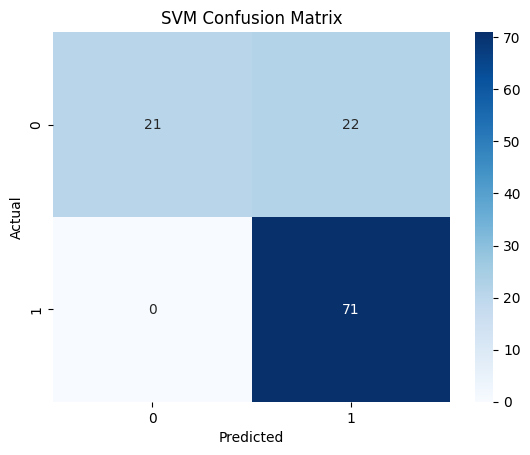

In [23]:
#Q23 Train an SVM Classifier & visualize the Confusion Matrix using Seaborn
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, svm_model.predict(X_test))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")
plt.show()


In [28]:
#Q24 Train an SVM Regressor (SVR) & evaluate performance using Mean Absolute Error (MAE) instead of MSE

from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR # Import the SVR class
from sklearn.model_selection import train_test_split # Import for data splitting (if not already imported)
# Assuming X and y are your features and target variable, split if necessary
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# If X_train, X_test, y_train, y_test are not defined yet

# Instantiate and fit the SVR model
svr_model = SVR()  # Create an instance of the SVR model
svr_model.fit(X_train, y_train)  # Train the model using your training data

y_pred_svr = svr_model.predict(X_test)
print("SVR Mean Absolute Error:", mean_absolute_error(y_test, y_pred_svr))

SVR Mean Absolute Error: 0.2546380618167319


In [25]:
#Q25 Train a Naïve Bayes classifier & evaluate performance using the ROC-AUC score
from sklearn.metrics import roc_auc_score

y_proba_nb = nb_model.predict_proba(X_test)[:, 1]
print("Naïve Bayes ROC-AUC Score:", roc_auc_score(y_test, y_proba_nb))


Naïve Bayes ROC-AUC Score: 0.7622011136586964


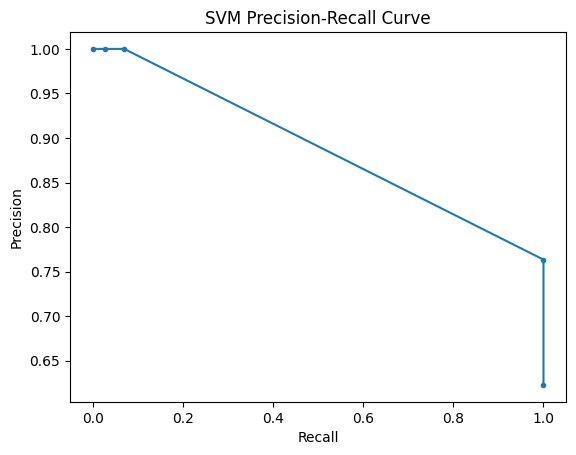

In [26]:
#Q26 Train an SVM Classifier & visualize the Precision-Recall Curve
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, svm_model.decision_function(X_test))
plt.plot(recall, precision, marker=".")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("SVM Precision-Recall Curve")
plt.show()